# Linear regression, Marieke Kopmels

Some setup things

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.linalg import block_diag, inv

number_of_classes = 10
n = 240
number_of_training_data = 1000
number_of_testing_data = 1000

In [152]:
def read_data(number_of_training_data, number_of_testing_data, n):
    training_data = pd.DataFrame(np.zeros((number_of_training_data, n)))
    testing_data = pd.DataFrame(np.zeros((number_of_testing_data, n)))

    data_file = open("mfeat-pix.txt")
    number_of_data_per_class = int(number_of_training_data/number_of_classes)
    
    # Read data
    for class_index in range(number_of_classes):
        for data_point_index in range(number_of_data_per_class):
            data_point = data_file.readline()
            char_index = 0
            for char in data_point:
                if char.isnumeric():
                    training_data.iloc[data_point_index+(class_index*number_of_data_per_class), char_index] = int(char)
                    char_index += 1
        for data_point_index in range(number_of_data_per_class):
            data_point = data_file.readline()
            char_index = 0
            for char in data_point:
                if char.isnumeric():
                    testing_data.iloc[data_point_index+(class_index*number_of_data_per_class), char_index] = int(char)
                    char_index += 1

    return training_data, testing_data

In [153]:
def compute_labels():
    b = np.ones((1,100)) 
    labels = block_diag(b, b, b, b, b, b, b, b, b, b)
    
    a = [1] * 100
    correct_labels = [e * 0 for e in a] + a + [e * 2 for e in a] + [e * 3 for e in a] + [e * 4 for e in a] + \
            [e * 5 for e in a] + [e * 6 for e in a] + [e * 7 for e in a] + [e * 8 for e in a] + [e * 9 for e in a]

    return pd.DataFrame(labels), pd.DataFrame(labels), pd.DataFrame(correct_labels).transpose()

In [154]:
def calculate_mean_train_images(training_data):
    mean_train_images = pd.DataFrame(np.zeros((number_of_classes, n)))
    training_data_points_per_class = number_of_training_data/number_of_classes
    
    for class_index in range(0, number_of_classes):
        row_1 = int(class_index*training_data_points_per_class)
        row_2 = int((class_index+1)*training_data_points_per_class)
        class_training_data = training_data.iloc[row_1:row_2, :]
        mean_train_images.iloc[class_index, :] = class_training_data.mean().transpose()

    return mean_train_images        

# def train_features_main_by_hand(training_data):
#     features = pd.DataFrame(np.zeros((number_of_classes, n)))
#     training_data_points_per_class = number_of_training_data/number_of_classes
    
#     for class_index in range(0, number_of_classes):
#         row_1 = int(class_index*training_data_points_per_class)
#         row_2 = int((class_index+1)*training_data_points_per_class)
# #         print("Row_1: ", row_1, ", row_2: ", row_2, ", class_index: ", class_index)
#         class_training_data = training_data.iloc[row_1:row_2, :]
# #         print("class_training_data: \n", class_training_data)
#         for column in range(0, class_training_data.shape[1]):
#             rowtotal = 0
#             for row in range(0, class_training_data.shape[0]):
# #                 print(type(rowtotal), type(class_training_data.iloc[row, column]))
#                 rowtotal += class_training_data.iloc[row, column]
#             features.iloc[class_index, column] = rowtotal/class_training_data.shape[0]
# #         print("Update, features:\n")
# #         print(features)
    
#     print("Final, features_by_hand:\n")
#     print(features)
#     return features

In [155]:
def calculate_feature_values(mean_train_images, training_data):
#     print("Dimensions of df's: ")
#     print("mean_train_images:\nrows: ", mean_train_images.shape[0], ", columns: ", mean_train_images.shape[1])
#     print("training_data:\nrows: ", training_data.shape[0], ", columns: ", training_data.shape[1])
    return mean_train_images.dot(training_data)

In [156]:
def compute_misclassifications(weights, feature_values_train, correct_labels):
    classification_hypotheses_train = weights.dot(feature_values_train)

    max_values_train = pd.DataFrame(np.zeros((1, 1000)))
    max_indices_train = pd.DataFrame(np.zeros((1, 1000)))

    for column in range(0, classification_hypotheses_train.shape[1]):
        max_values_train.iloc[0, column] = classification_hypotheses_train.iloc[:,column].max()
        max_indices_train.iloc[0, column] = classification_hypotheses_train.iloc[:,column].idxmax()
    

    
    misclassifications_train = correct_labels != max_indices_train
    no_misclassifications_train = sum(misclassifications_train.iloc[0,:].values.tolist())
    
    max_indices_train = max_indices_train.astype(int)
    max_indices_train = max_indices_train.to_numpy()
    correct_labels = correct_labels.to_numpy()
    
    matrix = confusion_matrix(correct_labels[0], max_indices_train[0])
    print(matrix)

    return no_misclassifications_train/number_of_training_data

## Main

In [157]:
training_data, testing_data = read_data(number_of_training_data, number_of_testing_data, n)

In [158]:
# print(training_data.iloc[490:550, :])

In [159]:
train_labels, test_labels, correct_labels = compute_labels()

In [160]:
mean_train_images = calculate_mean_train_images(training_data)

In [161]:
feature_values_train = calculate_feature_values(mean_train_images, training_data.transpose())
feature_values_test = calculate_feature_values(mean_train_images, testing_data.transpose())

In [162]:
a = pd.DataFrame(inv(feature_values_train.dot(feature_values_train.transpose())))
b = feature_values_train.dot(train_labels.transpose())
weights = a.dot(b).transpose()

In [163]:
no_misclassifications_train = compute_misclassifications(weights, feature_values_train, correct_labels)
no_misclassifications_test = compute_misclassifications(weights, feature_values_test, correct_labels)

print("Train misclassification rate = ", no_misclassifications_train)
print("Test misclassification rate = ", no_misclassifications_test)

[[100   0   0   0   0   0   0   0   0   0]
 [  1  88   0   0  10   1   0   0   0   0]
 [  0   1  97   1   0   0   0   1   0   0]
 [  0   1   0  92   0   1   0   6   0   0]
 [  0   5   0   0  94   0   0   0   0   1]
 [  1   1   1   3   0  88   5   0   1   0]
 [  1   0   0   2   2   1  89   0   5   0]
 [  0   0   4   0   0   0   0  93   0   3]
 [  3   2   3   2   1   1   2   1  79   6]
 [  1   1   1   0   0   1   0   2   2  92]]
[[96  1  0  0  1  0  0  1  0  1]
 [ 0 90  0  0  3  5  0  0  0  2]
 [ 0  1 95  0  0  0  1  1  0  2]
 [ 2  1  1 92  1  0  1  1  1  0]
 [ 0  7  0  1 88  0  1  1  0  2]
 [ 0  0  0  4  1 90  4  0  0  1]
 [ 0  1  1  2  4  4 86  0  2  0]
 [ 1  0  2  0  0  0  0 94  0  3]
 [ 2  4  3  0  0  1  7  0 83  0]
 [ 1  2  0  0  0  1  0  1  0 95]]
Train misclassification rate =  0.088
Test misclassification rate =  0.091


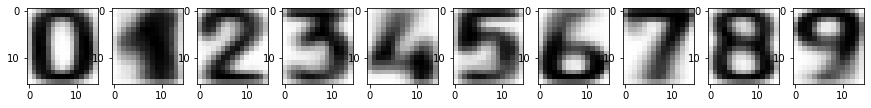

In [22]:
# Plotting of the mean_train_images

array = [[[0]*15 for i in range(16)] for j in range(number_of_classes)]

for class_index in range(len(array)):
    for row in range(len(array[0])):
        for column in range(len(array[0][0])):
            features_column = row*len(array[0][0]) + column
            val = mean_train_images.iloc[class_index,features_column]
            array[class_index][row][column] = val


fig, axes = plt.subplots(1,10, figsize=(15,16))

for i, ax in enumerate(axes.flat):
    ax.imshow(array[i], cmap='gray_r')


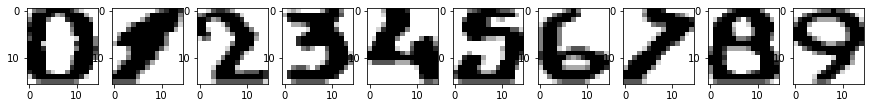

In [38]:
# Plotting of some input images

array = [[[0]*15 for i in range(16)] for j in range(number_of_classes)]

for class_index in range(len(array)):
    for row in range(len(array[0])):
        for column in range(len(array[0][0])):
#             print("class_index = ", class_index*200, " example_column: ", example_column)
            example_column = row*len(array[0][0]) + column
            val = training_data.iloc[class_index*100, example_column]
            array[class_index][row][column] = val

fig, axes = plt.subplots(1,10, figsize=(15,16))

for i, ax in enumerate(axes.flat):
    ax.imshow(array[i], cmap='gray_r')

In [15]:
# Mini test dataframe > array > image

test_features = pd.DataFrame([[7, 3, 2, 1, 5, 6, 1, 3, 2, 4, 8, 9]])
print(test_features)

test_array = [[0]*4 for i in range(3)]

for row in range(0,len(test_array)):
    for column in range(0,len(test_array[0])):
        print("row: ", row, ", column: ", column)
        test_features_column = row*len(test_array[0]) + column
#         print("test_features_column: ", test_features_column)
        val = test_features.iloc[0,test_features_column]
        print(val)
        test_array[row][column] = val
        print("update:")
        print(test_array)
print("after:")
print(test_array)


   0   1   2   3   4   5   6   7   8   9   10  11
0   7   3   2   1   5   6   1   3   2   4   8   9
row:  0 , column:  0
7
update:
[[7, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
row:  0 , column:  1
3
update:
[[7, 3, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
row:  0 , column:  2
2
update:
[[7, 3, 2, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
row:  0 , column:  3
1
update:
[[7, 3, 2, 1], [0, 0, 0, 0], [0, 0, 0, 0]]
row:  1 , column:  0
5
update:
[[7, 3, 2, 1], [5, 0, 0, 0], [0, 0, 0, 0]]
row:  1 , column:  1
6
update:
[[7, 3, 2, 1], [5, 6, 0, 0], [0, 0, 0, 0]]
row:  1 , column:  2
1
update:
[[7, 3, 2, 1], [5, 6, 1, 0], [0, 0, 0, 0]]
row:  1 , column:  3
3
update:
[[7, 3, 2, 1], [5, 6, 1, 3], [0, 0, 0, 0]]
row:  2 , column:  0
2
update:
[[7, 3, 2, 1], [5, 6, 1, 3], [2, 0, 0, 0]]
row:  2 , column:  1
4
update:
[[7, 3, 2, 1], [5, 6, 1, 3], [2, 4, 0, 0]]
row:  2 , column:  2
8
update:
[[7, 3, 2, 1], [5, 6, 1, 3], [2, 4, 8, 0]]
row:  2 , column:  3
9
update:
[[7, 3, 2, 1], [5, 6, 1, 3], [2, 4, 8, 9]]
after:
[[7, 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0.0 0.0 5.0 13.0 9.0 1.0 0.0 0.0 0.0 0.0 13.0 15.0 10.0 15.0 5.0 0.0 0.0 3.0 15.0 2.0 0.0 11.0 8.0 0.0 0.0 4.0 12.0 0.0 0.0 8.0 8.0 0.0 0.0 5.0 8.0 0.0 0.0 9.0 8.0 0.0 0.0 4.0 11.0 0.0 1.0 12.0 7.0 0.0 0.0 2.0 14.0 5.0 10.0 12.0 0.0 0.0 0.0 0.0 6.0 13.0 10.0 0.0 0.0 0.0 Axes: 
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <

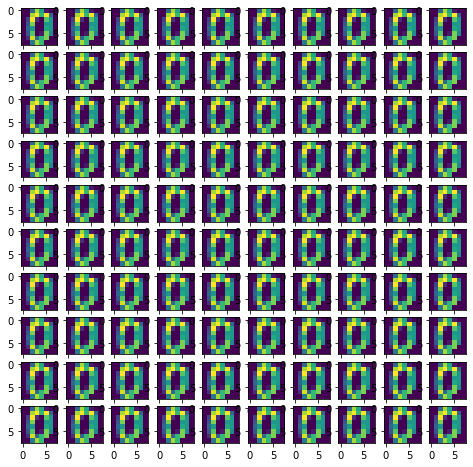

In [16]:
# Example to plot image 

test = [[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]

test = np.array(test)

print(test)
for item in (test.flat):
    print (item, end=' ')

fig, axes = plt.subplots(10,10, figsize=(8,8))

print("Axes: ")
print(axes)

for i, ax in enumerate(axes.flat):
    ax.imshow(test)